In [1]:
from epd_plot import *
# Path to the solo data files.
data_path = '/Users/dresing/data/projects/solo/SOAR/'

# Path to where images and .csv -files will be saved.
image_path = '/Users/dresing/SolarOrbiter/SOLO_SPECTRA/output_code_Aleksi/'
csv_path = '/Users/dresing/SolarOrbiter/SOLO_SPECTRA/output_code_Aleksi/'

In [2]:
# Start and end day. Format: yyyymmdd.
start_date = 20201118
end_date = 20201119

# Timestamps for the plotting parameters. Format: yyyy-mm-dd-hhhh.
#plot_start = '2020-11-18-0000'
#plot_end = '2020-11-19-2000'
#search_start = '2020-11-18-1300'
#search_end = '2020-11-18-1500'
#bg_start = '2020-11-18-1100'
#bg_end = '2020-11-18-1230'

plot_start = '2020-11-18-0000'
plot_end = '2020-11-19-2000'
search_start = '2020-11-19-0600'
search_end = '2020-11-19-0800'
bg_start = '2020-11-18-1100'
bg_end = '2020-11-18-1230'


# Averaging. 'mean' = rolling mean, 'none' = no averaging.
averaging_mode = 'mean'
averaging = 5

In [3]:
# Toggle individual instruments. For use if for example one instrument doesn't have data yet.
ept = True
het = True
step = True

# Toggles the step masking from Ninas function. No reason to be False.
step_masking = True

In [4]:
# Toggle saving of the images and .csv -files.
saving = False

# STEP

/Users/dresing/python/Aleksi_epd_plot-main/epd_plot.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electron_fluxes[df_electron_fluxes<0] = np.NaN
/Users/dresing/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/Users/dresing/python/Aleksi_epd_plot-main/epd_plot.py:344: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((flux_err ** 2).sum(axis=0)) / len(flux_err.values)


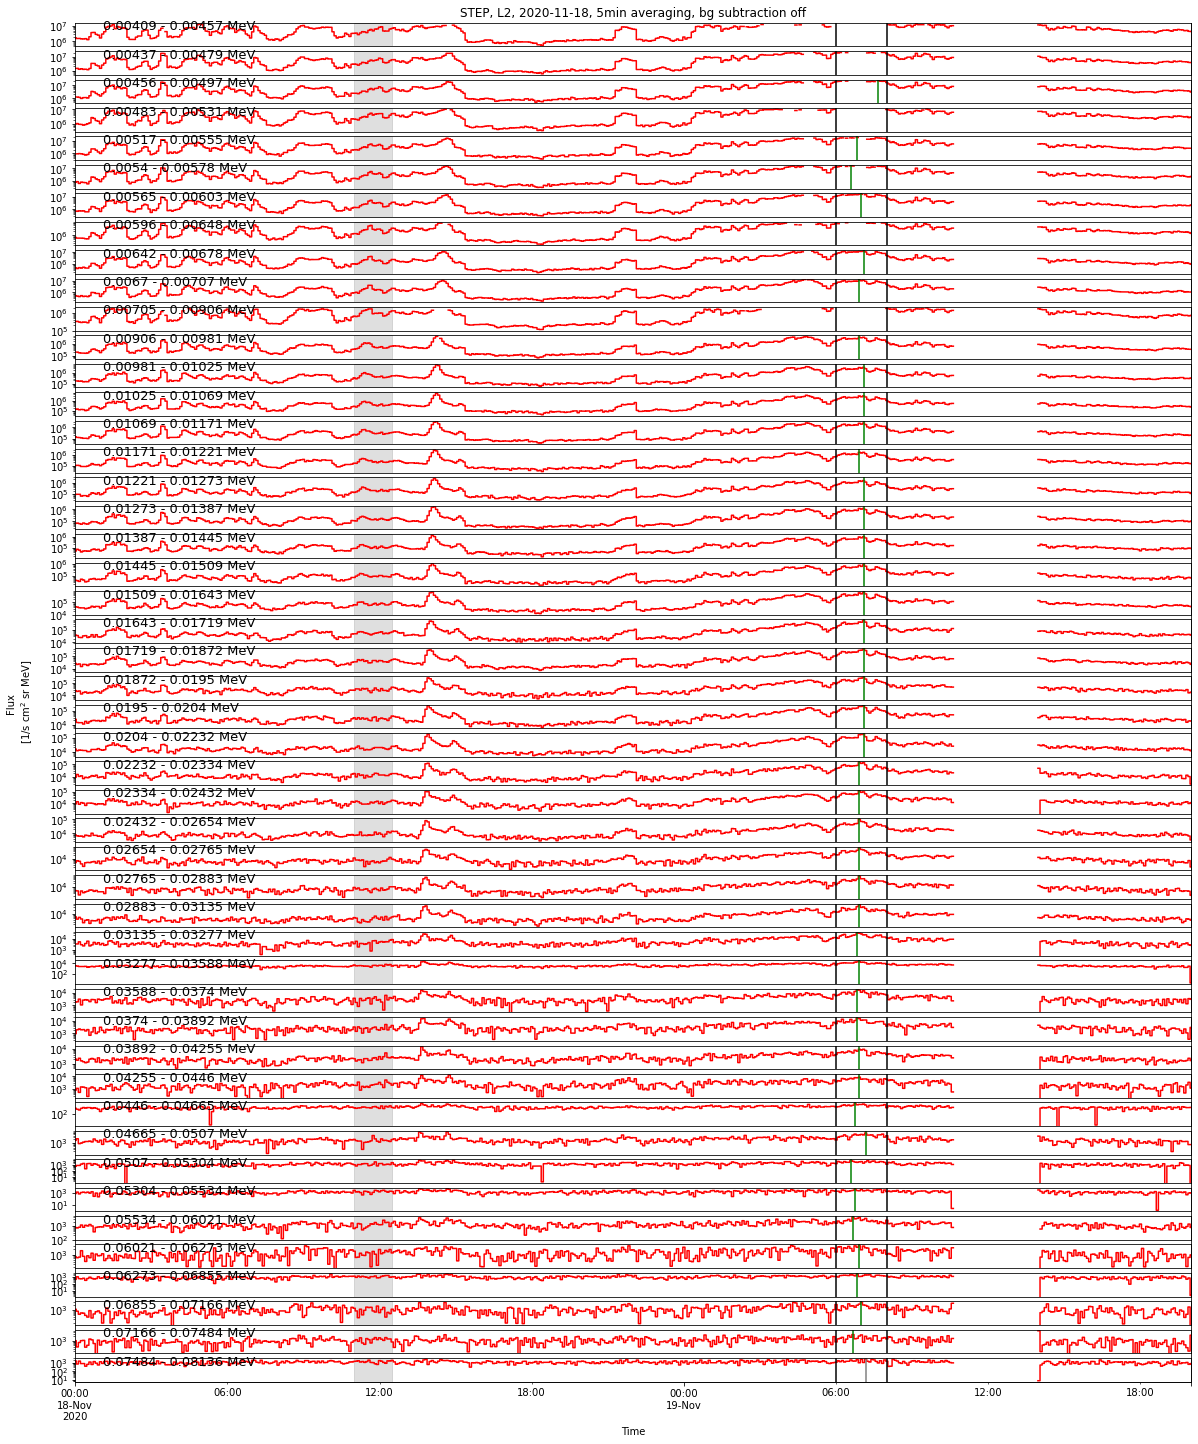

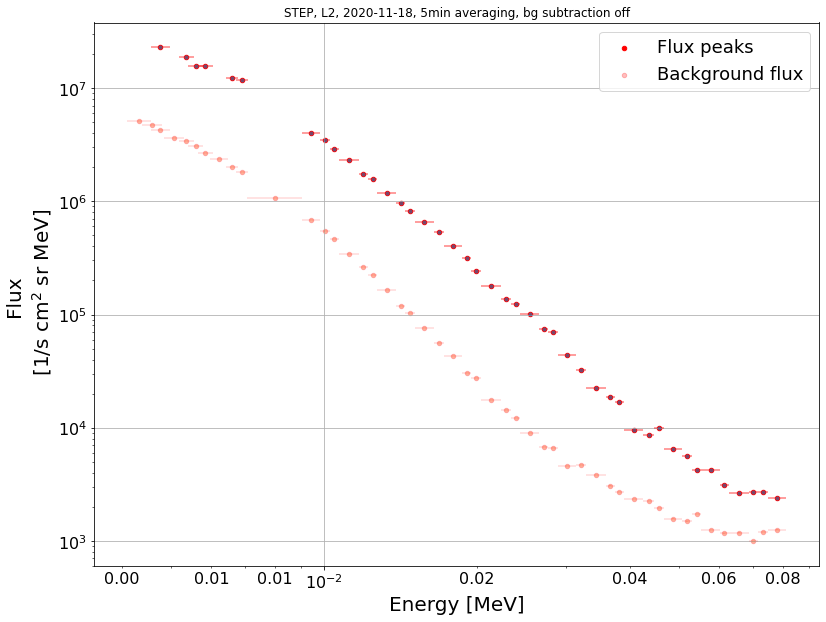

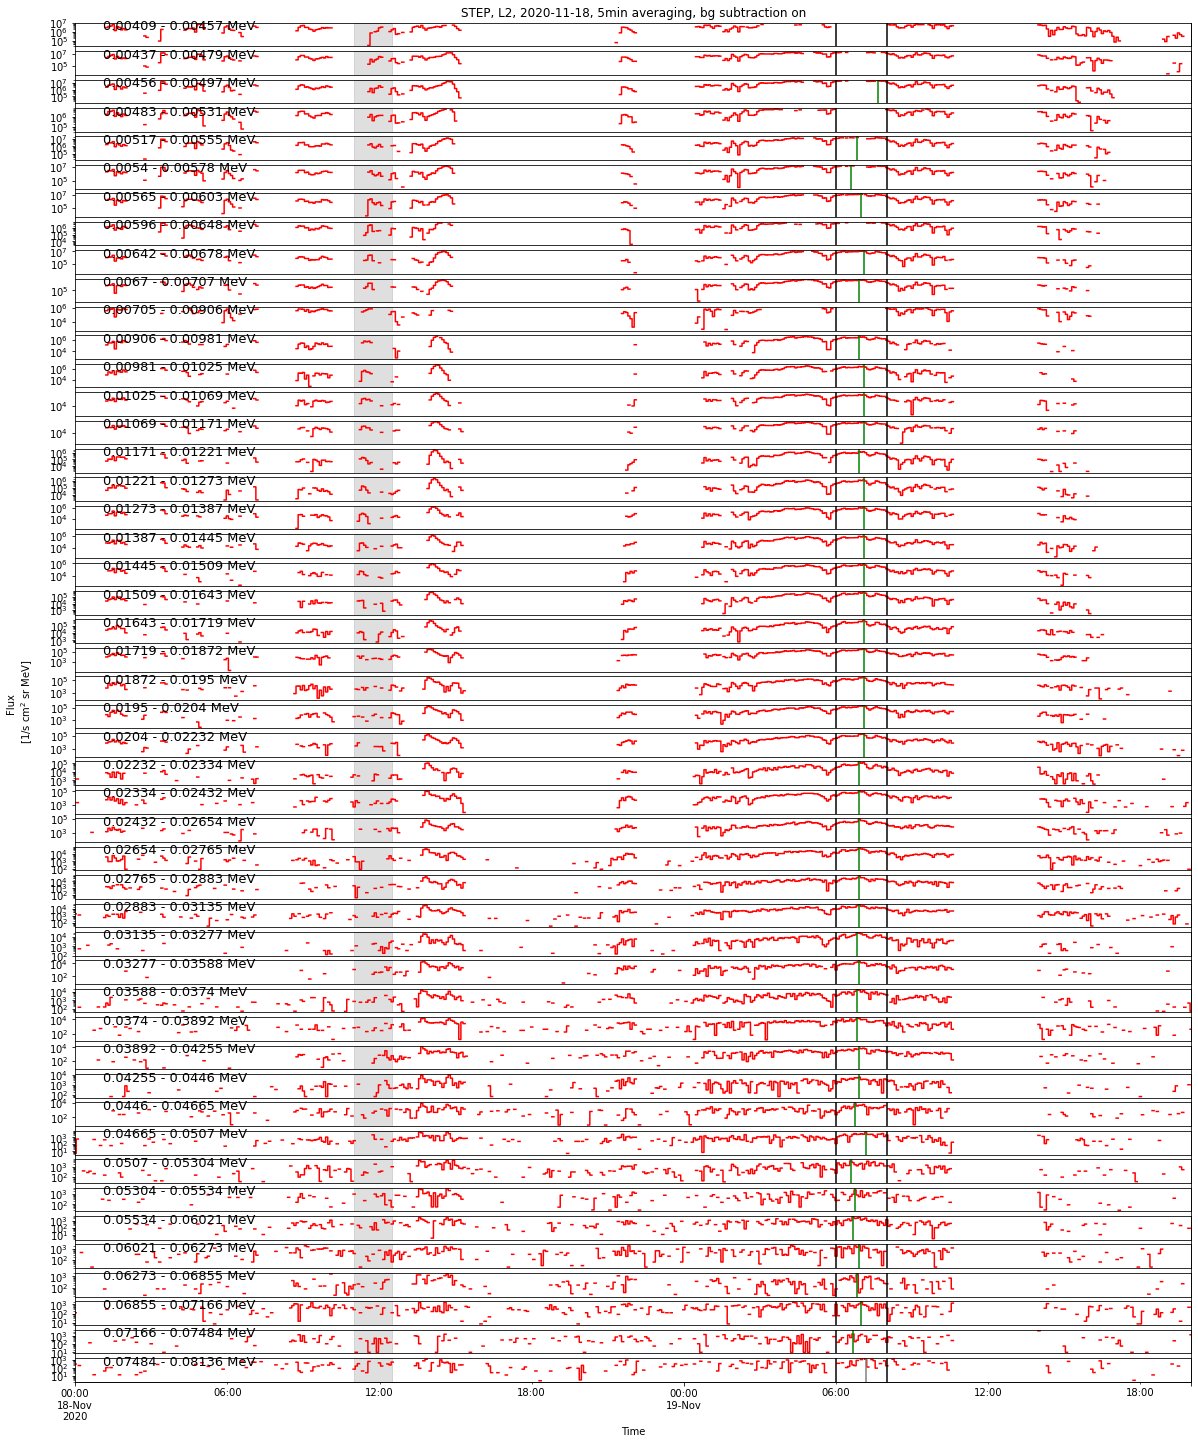

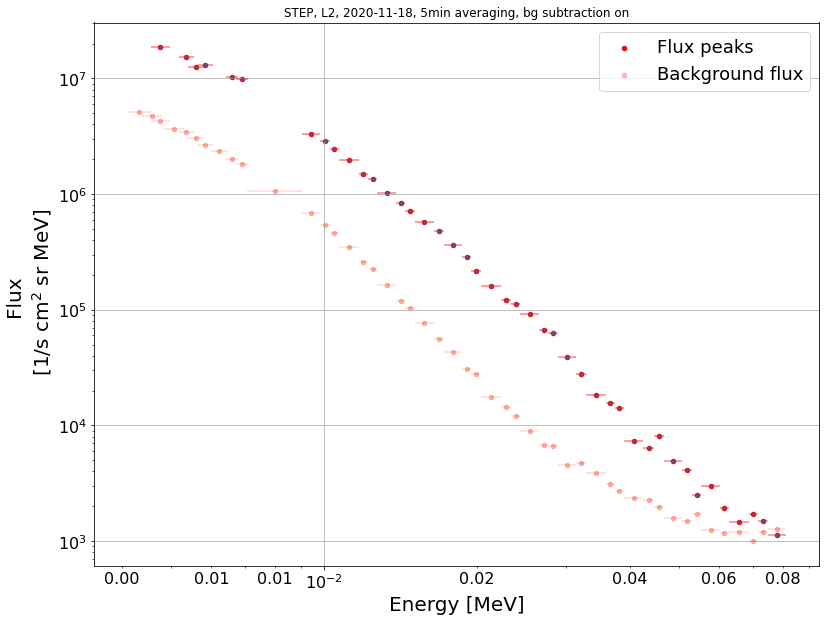

In [5]:
if(step):
    df_particles_step, energies_step = epd_load(sensor='step', viewing='sun', level='l2', startdate=start_date, enddate=end_date, path=data_path, autodownload=True)
    data_step = extract_step_data(df_particles_step, plot_start, plot_end, search_start, search_end, bg_start, bg_end, frac_nan_threashold=0.5, instrument='step', data_type='l2', averaging_mode=averaging_mode, averaging=averaging, masking=step_masking)
    if saving: write_to_csv(data_step, path=csv_path)
    for bg_b in [False, True]:
        plot_channels(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)
        plot_spectrum(data_step, bg_subtraction=bg_b, path=image_path, savefig=saving)

In [6]:
data_step[1]

Plot_period    Search_period        Bg_period          Averaging  \
0   2020-11-18-0000  2020-11-19-0600  2020-11-18-1100               Mean   
1   2020-11-19-2000  2020-11-19-0800  2020-11-18-1230  Resampled to 5min   
2                                                                          
3                                                                          
4                                                                          
5                                                                          
6                                                                          
7                                                                          
8                                                                          
9                                                                          
10                                                                         
11                                                                         
12                                                                         
13                                                                         
14                                                                         
15                                                                         
16                                                                         
17                                                                         
18                                                                         
19                                                                         
20                                                                         
21                                                                         
22                                                                         
23                                                                         
24                                                                         
25                                                                         
26                                                                         
27                                                                         
28                                                                         
29                                                                         
30                                                                         
31                                                                         
32                                                                         
33                                                                         
34                                                                         
35                                                                         
36                                                                         
37                                                                         
38                                                                         
39                                                                         
40                                                                         
41                                                                         
42                                                                         
43                                                                         
44                                                                         
45                                                                         
46                                                                         
47                                                                         

   Ion_masking  Energy_channel  Primary_energy  Energy_error_low  \
0         True               0        0.004323          0.000233   
1                            1        0.004575          0.000205   
2                            2        0.004761          0.000201   
3          

--------------------
### EPT

/Users/dresing/python/Aleksi_epd_plot-main/epd_plot.py:337: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt((flux_err ** 2).sum(axis=0)) / len(flux_err.values)


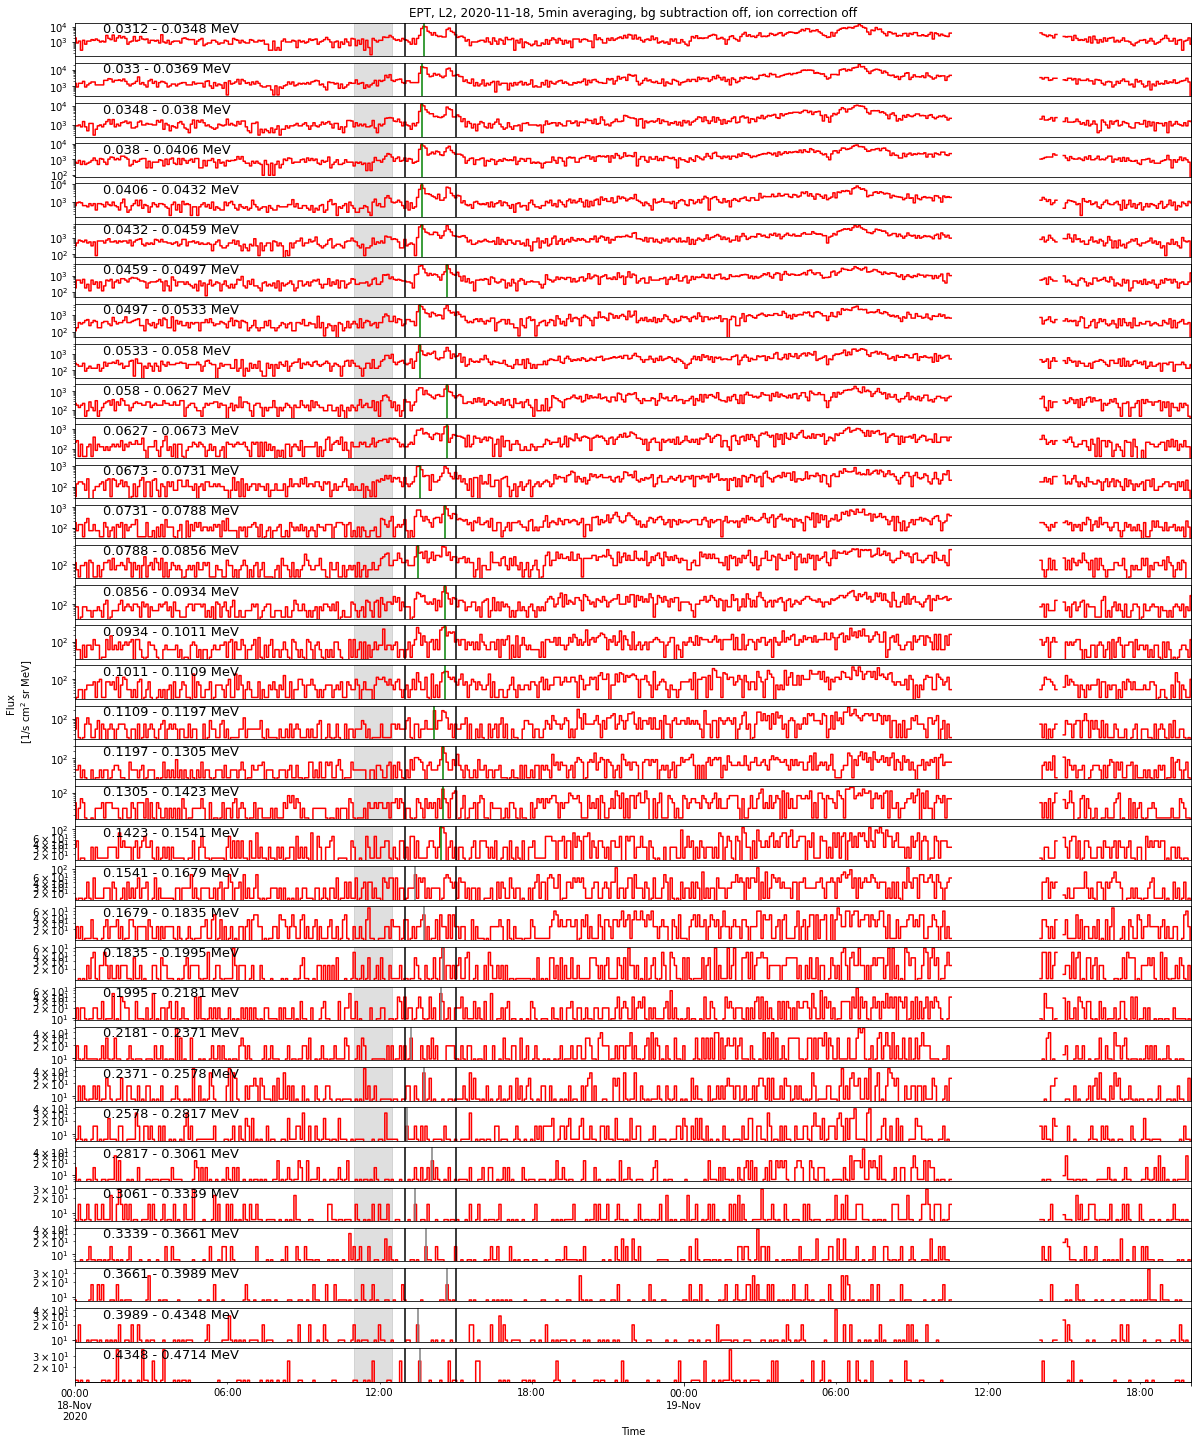

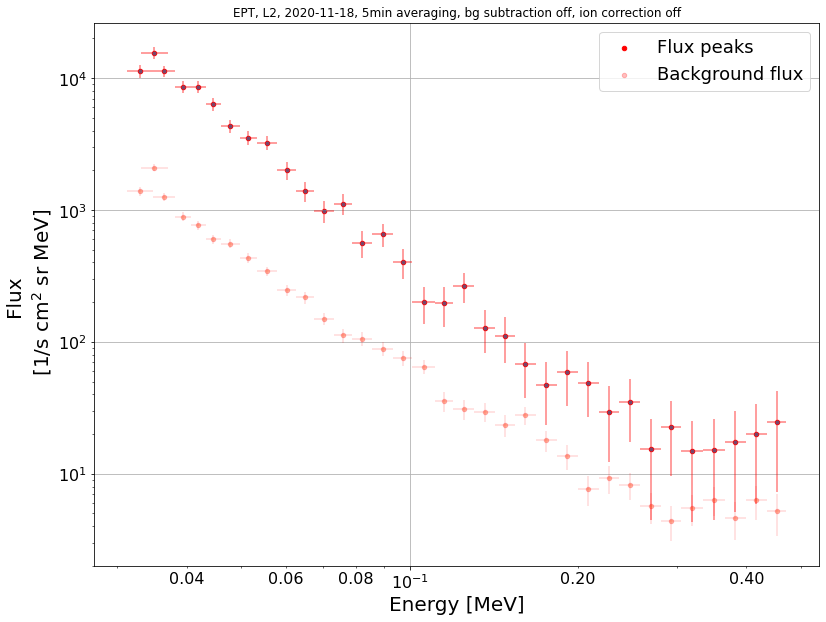

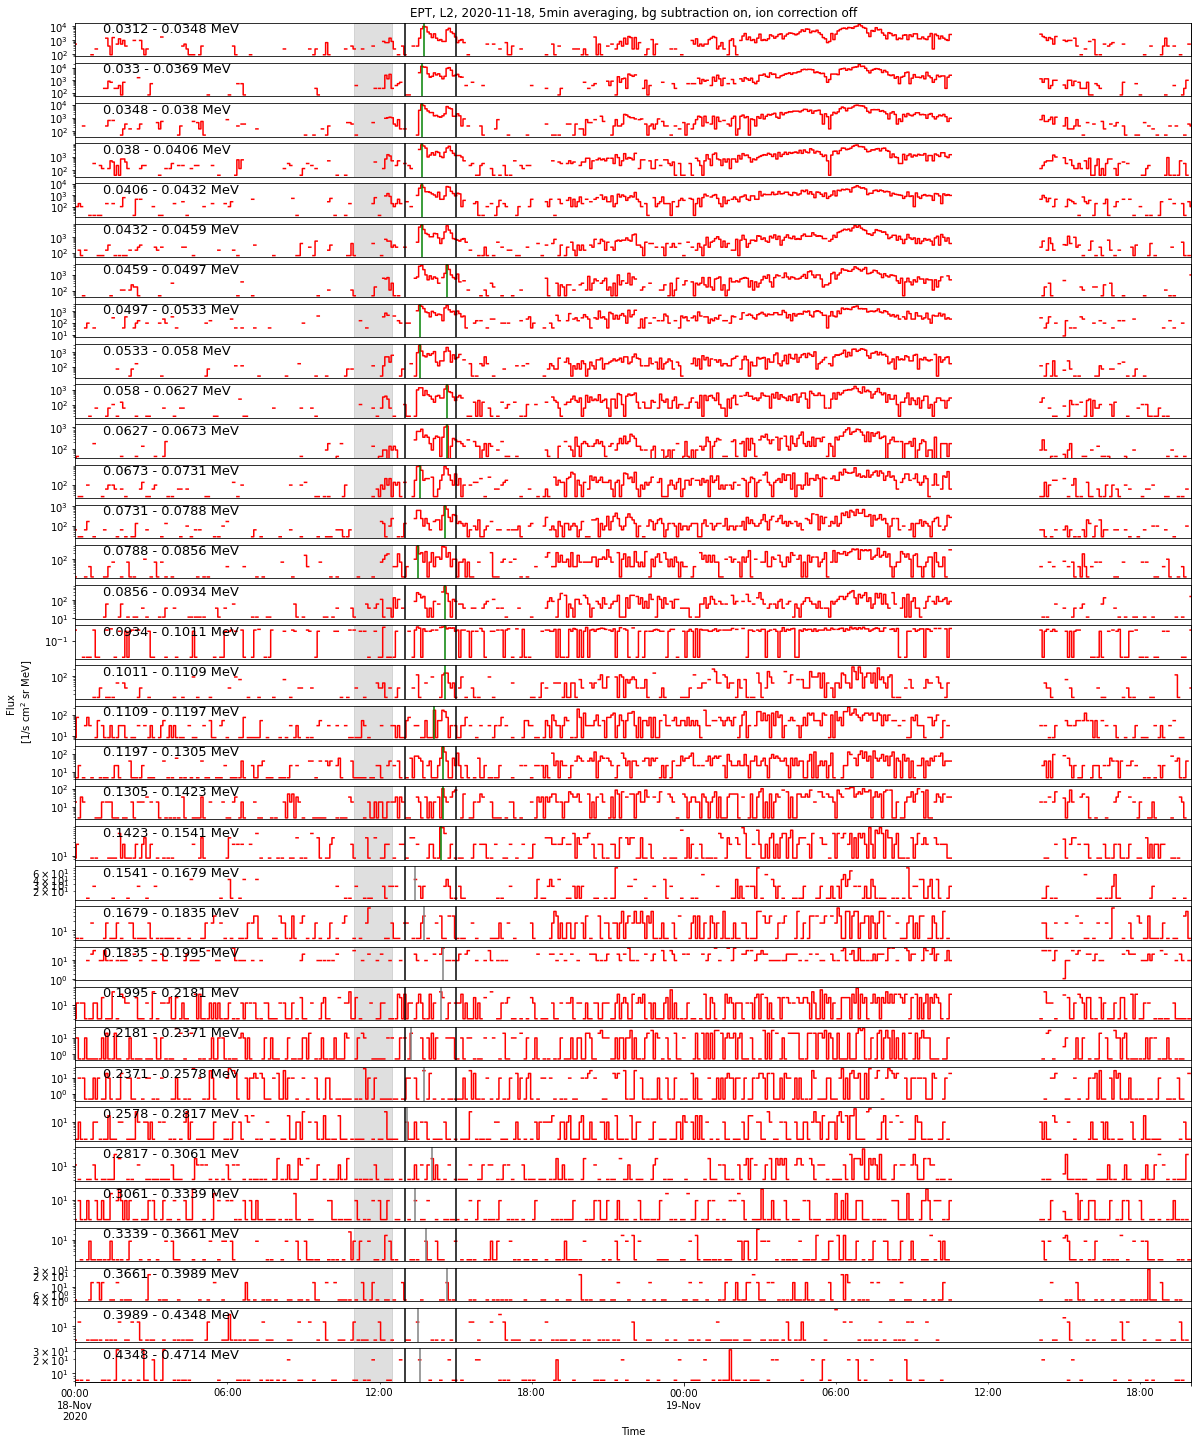

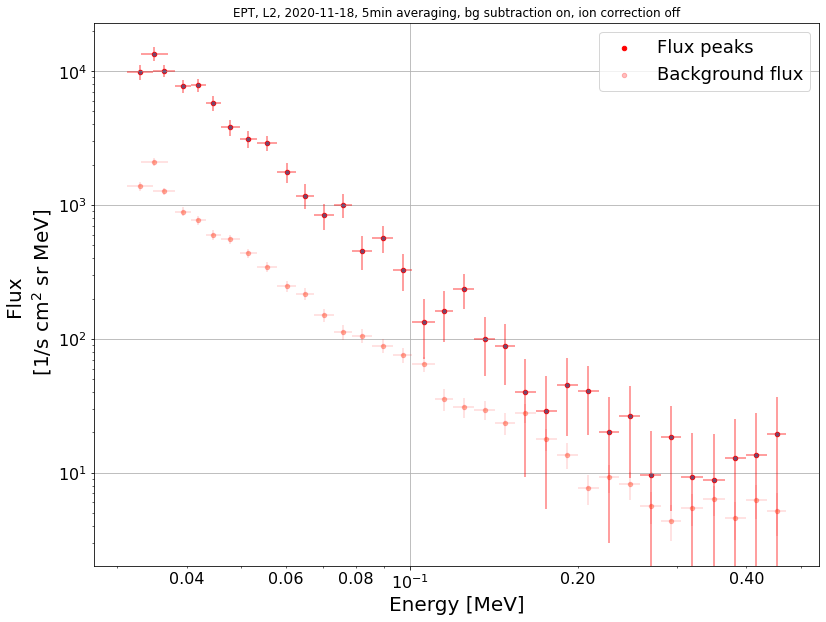

/Users/dresing/python/Aleksi_epd_plot-main/epd_plot.py:337: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt((flux_err ** 2).sum(axis=0)) / len(flux_err.values)


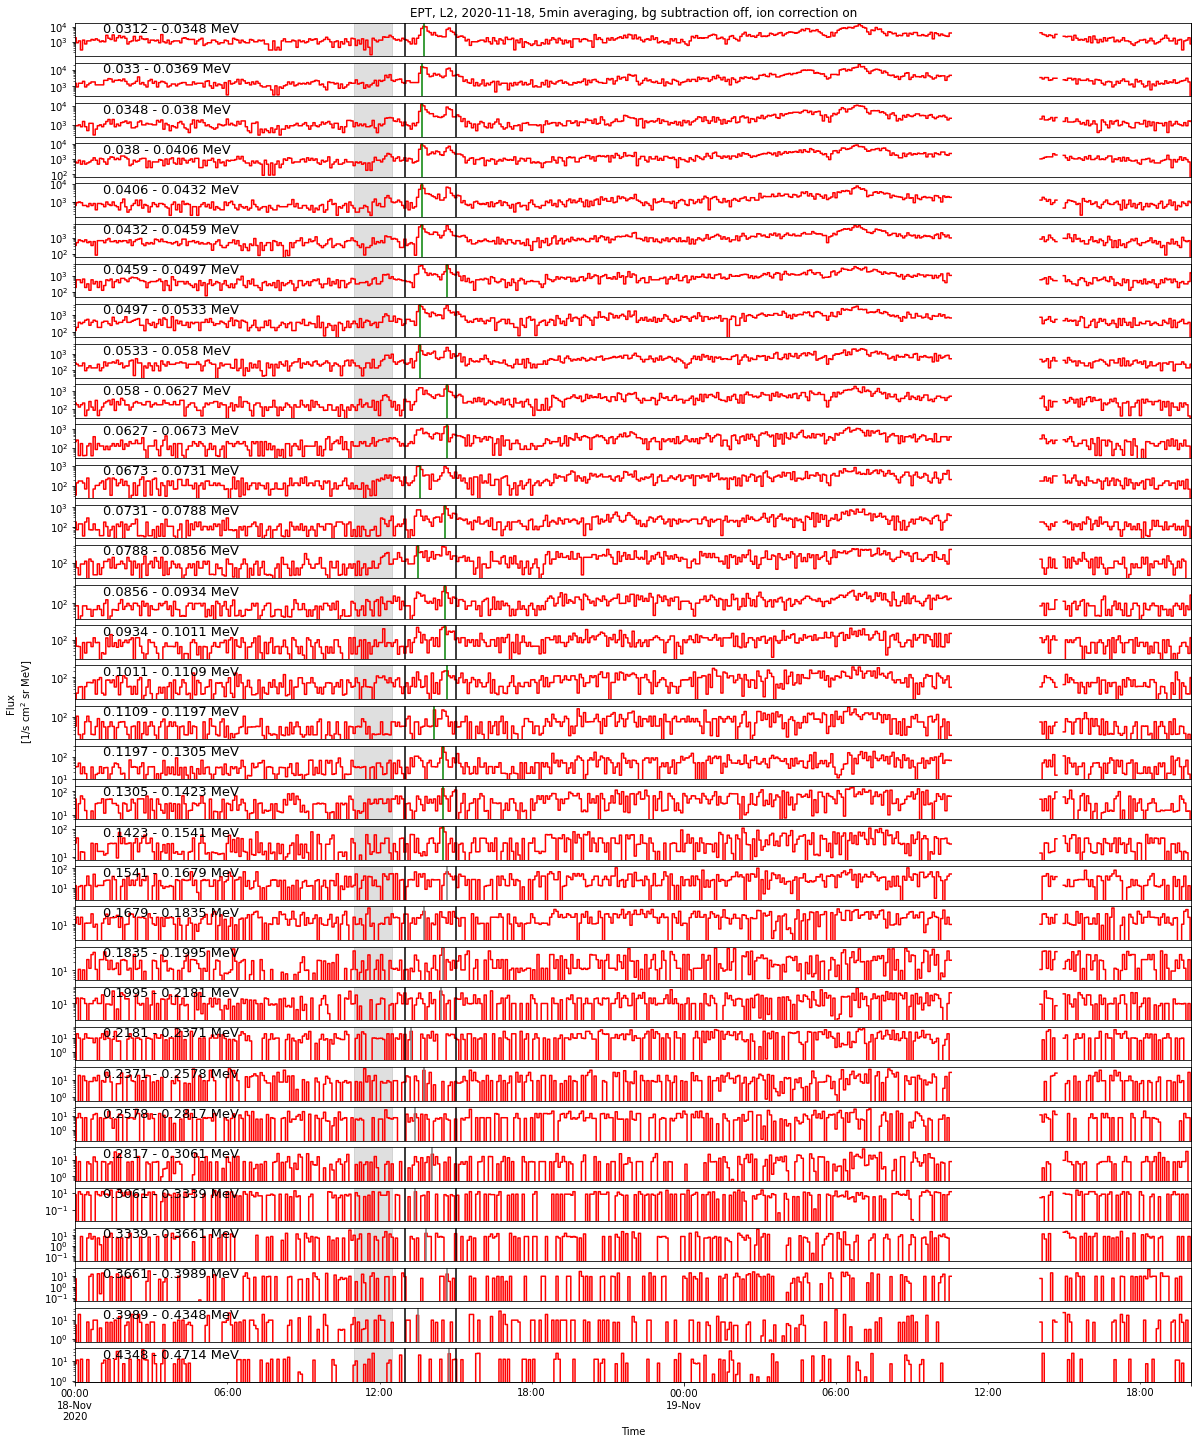

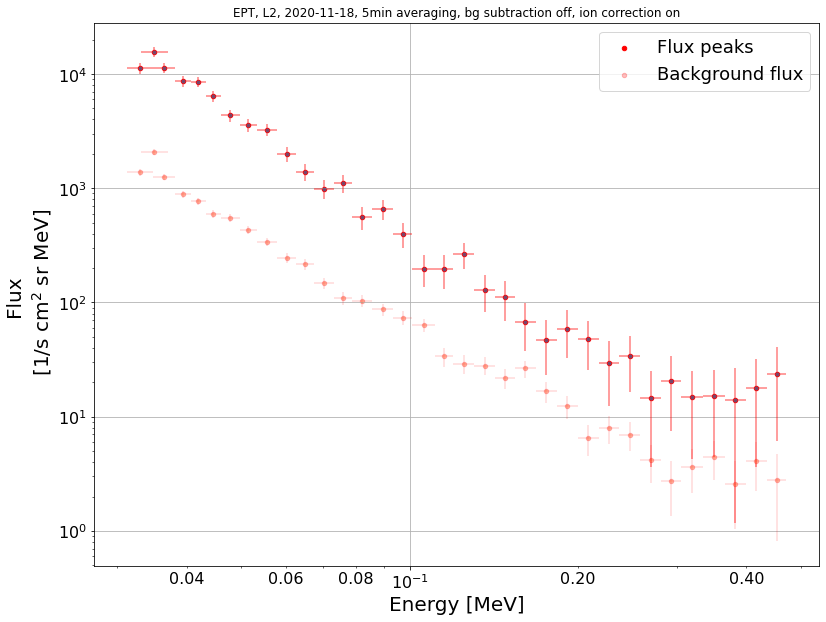

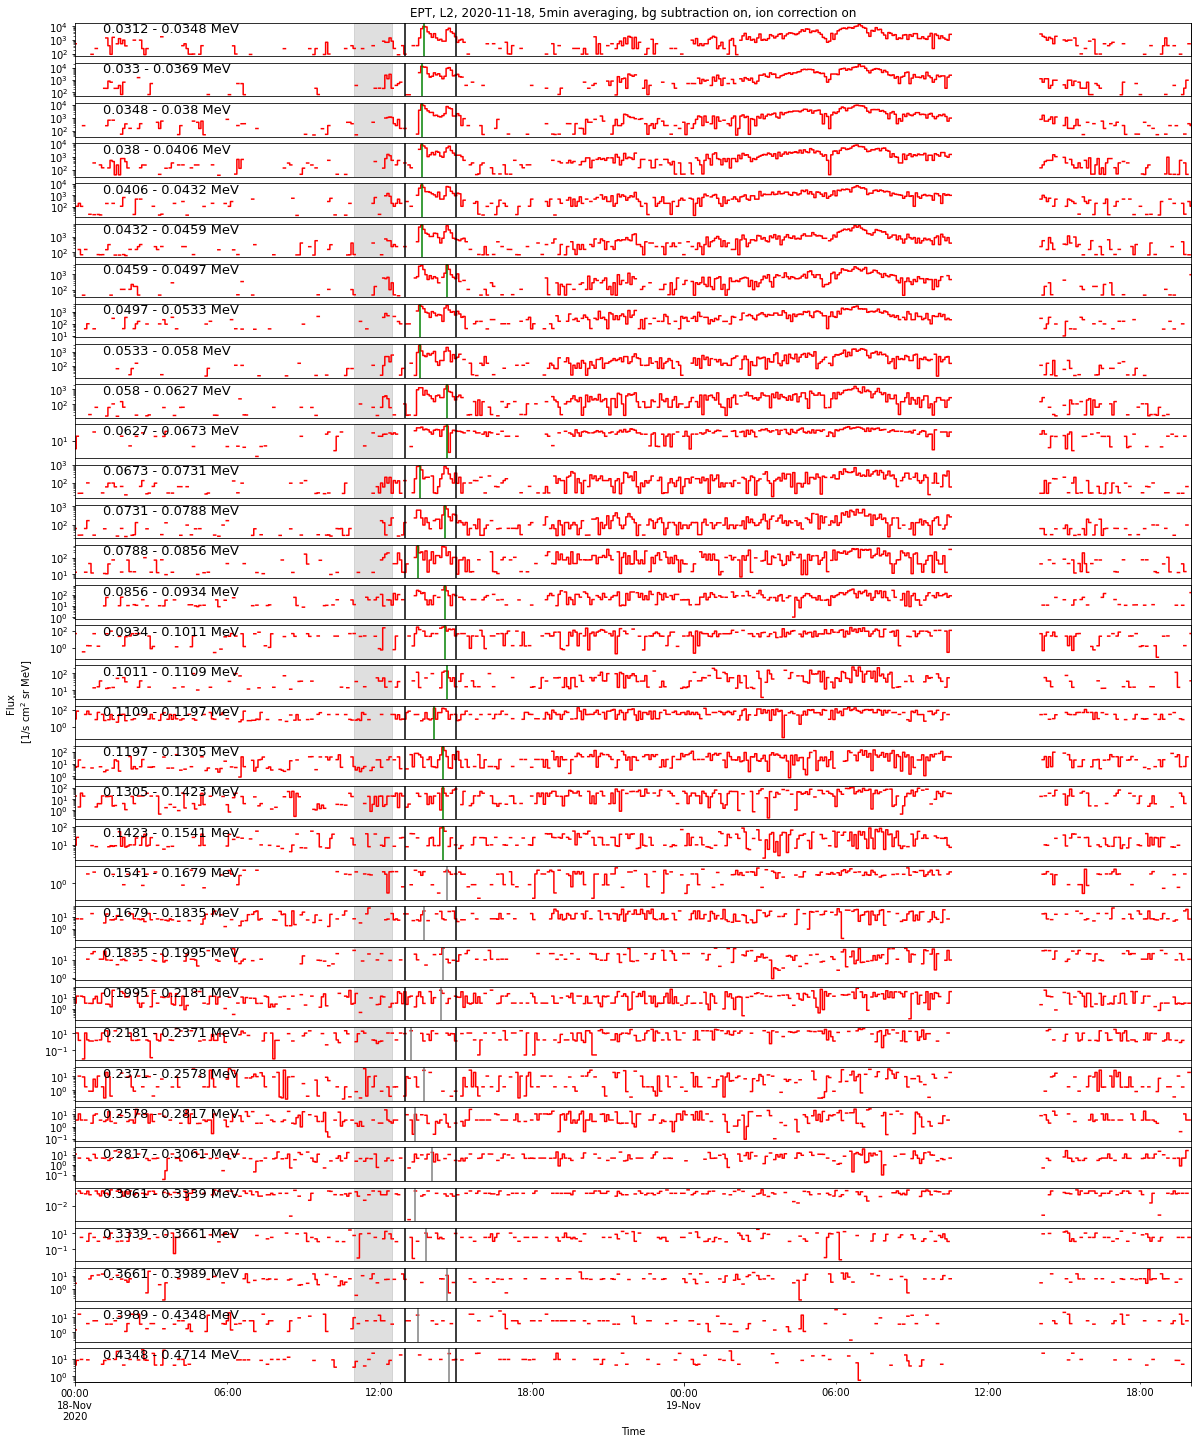

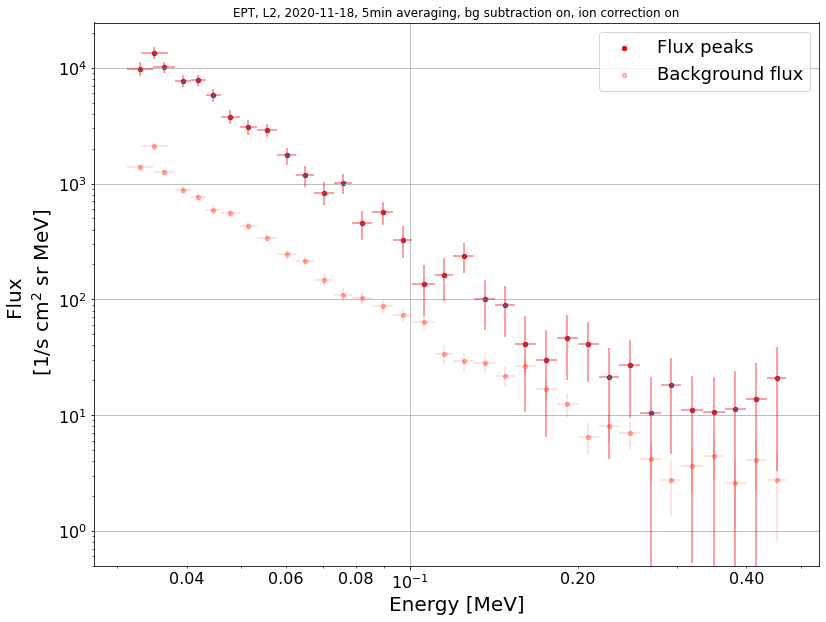

In [6]:
if(ept):
    df_protons_ept, df_electrons_ept, energies_ept = read_epd_cdf('ept', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    for ion_b in [False, True]:
        data_ept = extract_data(df_protons_ept, df_electrons_ept, plot_start, plot_end, search_start, search_end, bg_start, bg_end, instrument='ept', data_type='l2', averaging_mode=averaging_mode, averaging=averaging, ion_conta_corr=ion_b)
        if saving: write_to_csv(data_ept, path=csv_path)
        for bg_b in [False, True]:
            plot_channels(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving)
            plot_spectrum(data_ept, bg_subtraction=bg_b, path=image_path, savefig=saving)      

In [7]:
peak = data_ept[1].Bg_subtracted_peak
unc = data_ept[1].Backsub_peak_uncertainty
rel_err = data_ept[1]['rel_backsub_peak_err']


for i in range(len(peak)):
    #print(i, (peak[i]-unc[i])/unc[i], abs(unc[i]/peak[i]), data_ept[1].Peak_significance[i])
    print(i, rel_err[i], data_ept[1].Peak_significance[i])

0 0.1312445671966644 13.635399224517803
1 0.11537165431857795 11.534502772583672
2 0.10665320884937697 16.13242445753534
3 0.11662577978111284 12.951035406342875
4 0.1112372281368992 13.973562825642883
5 0.1269613896672009 16.16459788550958
6 0.1355881350925104 12.155553938692542
7 0.14764910708091852 12.474715287821686
8 0.13311591601199324 10.792624960399259
9 0.1706754744427767 10.548824472152319
10 0.21026806463769318 15.086656063095255
11 0.22375298056659562 8.200060537873519
12 0.19709277546970483 10.847203967395542
13 0.28327337240522105 5.915923209703438
14 0.2277648430826403 10.90518567942477
15 0.3092322483271612 4.705701914142
16 0.4693538392385157 3.7974995598916266
17 0.40559002985864123 7.257160115606429
18 0.29124719675805777 11.67517832521906
19 0.4559250779949904 6.067311657815035
20 0.47417673181335074 4.2629948277955885
21 0.743415055051797 2.135106136024504
22 0.7875260111415632 1.8411466280566333
23 0.5710053348797323 3.193793056153926
24 0.5318202601564809 4.66472

In [8]:
data_ept[1]

Plot_period    Search_period        Bg_period          Averaging  \
0   2020-11-18-0000  2020-11-18-1300  2020-11-18-1100               Mean   
1   2020-11-19-2000  2020-11-18-1500  2020-11-18-1230  Resampled to 5min   
2                                                                          
3                                                                          
4                                                                          
5                                                                          
6                                                                          
7                                                                          
8                                                                          
9                                                                          
10                                                                         
11                                                                         
12                                                                         
13                                                                         
14                                                                         
15                                                                         
16                                                                         
17                                                                         
18                                                                         
19                                                                         
20                                                                         
21                                                                         
22                                                                         
23                                                                         
24                                                                         
25                                                                         
26                                                                         
27                                                                         
28                                                                         
29                                                                         
30                                                                         
31                                                                         
32                                                                         
33                                                                         

   Ion_contamination_correction  Energy_channel  Primary_energy  \
0                          True               0        0.032951   
1                                             1        0.034896   
2                                             2        0.036365   
3                                             3        0.039278   
4                                             4        0.041880   
5                                             5        0.044530   
6                                             6        0.047762   
7                                             7        0.051469   
8                                             8        0.055600   
9                                             9        0.060304   
10                                           10        0.064959   
11                                           11        0.070140   
12                                           12        0.075897   
13                                           13        0.082130   
14                                           14        0.089415   
15                                           15        0.097174   
16                                           16        0.105887   
17                                           17        0.115216   
18                                           18        0.124983   
19     

[   0.      136.9713  228.2855  319.5997  365.2568  456.571   502.2281
  593.5423  684.8565  913.142  1141.4275 1369.713  1597.9985 1826.284
 2054.5696 2282.855  2511.1406 2739.426  2967.7114 3424.2825 3652.568
 4109.139        nan       nan       nan]


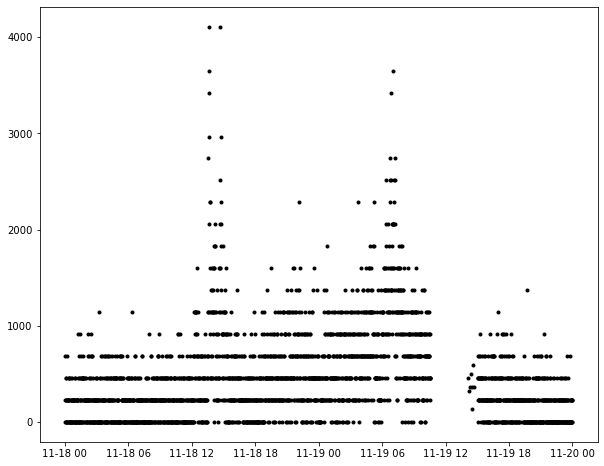

In [9]:
channel = df_electrons_ept.Electron_Flux.Electron_Flux_8
f, ax=plt.subplots(figsize=(10, 8))
ax.plot(channel.index, channel.values, '.k')
#for i in np.unique(channel.values):
 #   ax.axhline(y=i)
print(np.unique(channel.values))

--------------
### HET

/Users/dresing/python/Aleksi_epd_plot-main/epd_plot.py:337: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt((flux_err ** 2).sum(axis=0)) / len(flux_err.values)


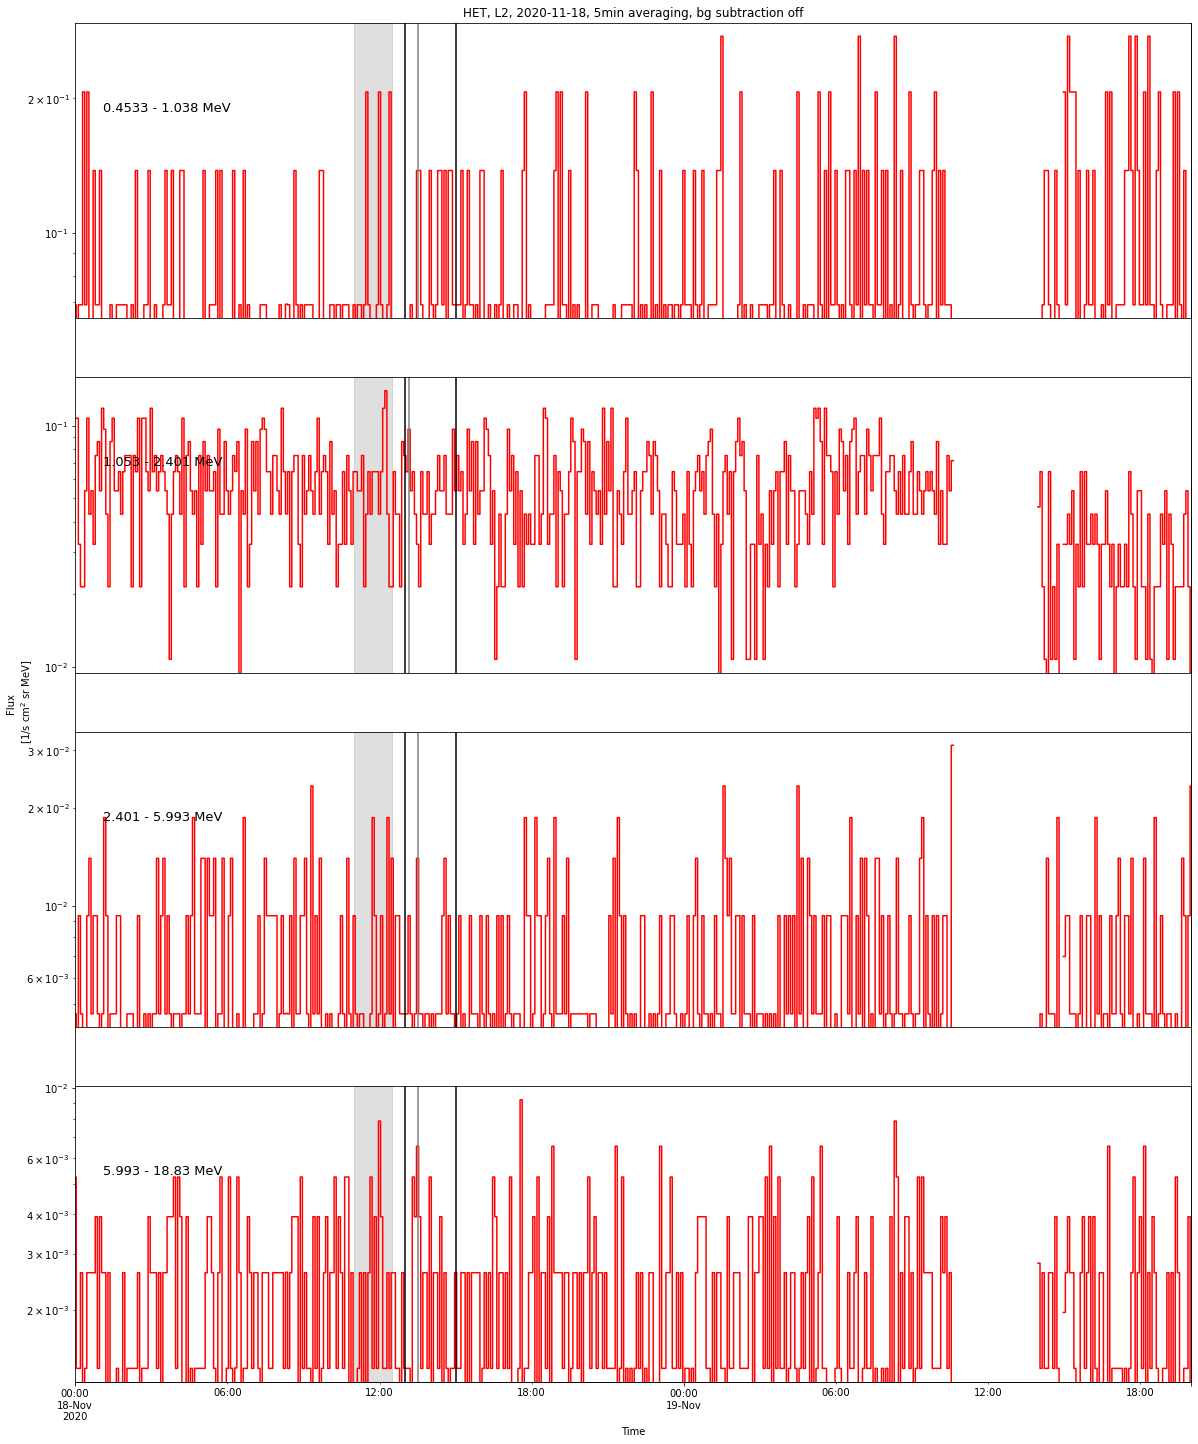

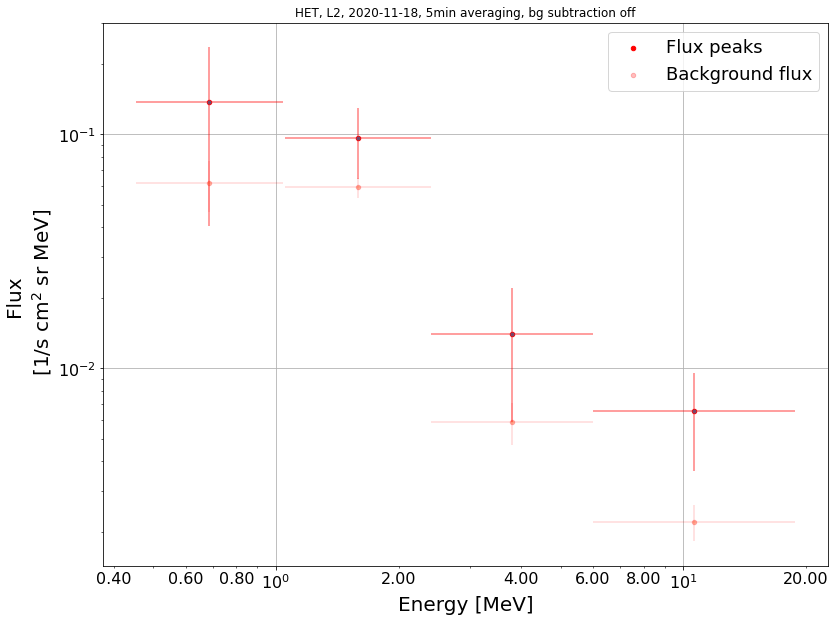

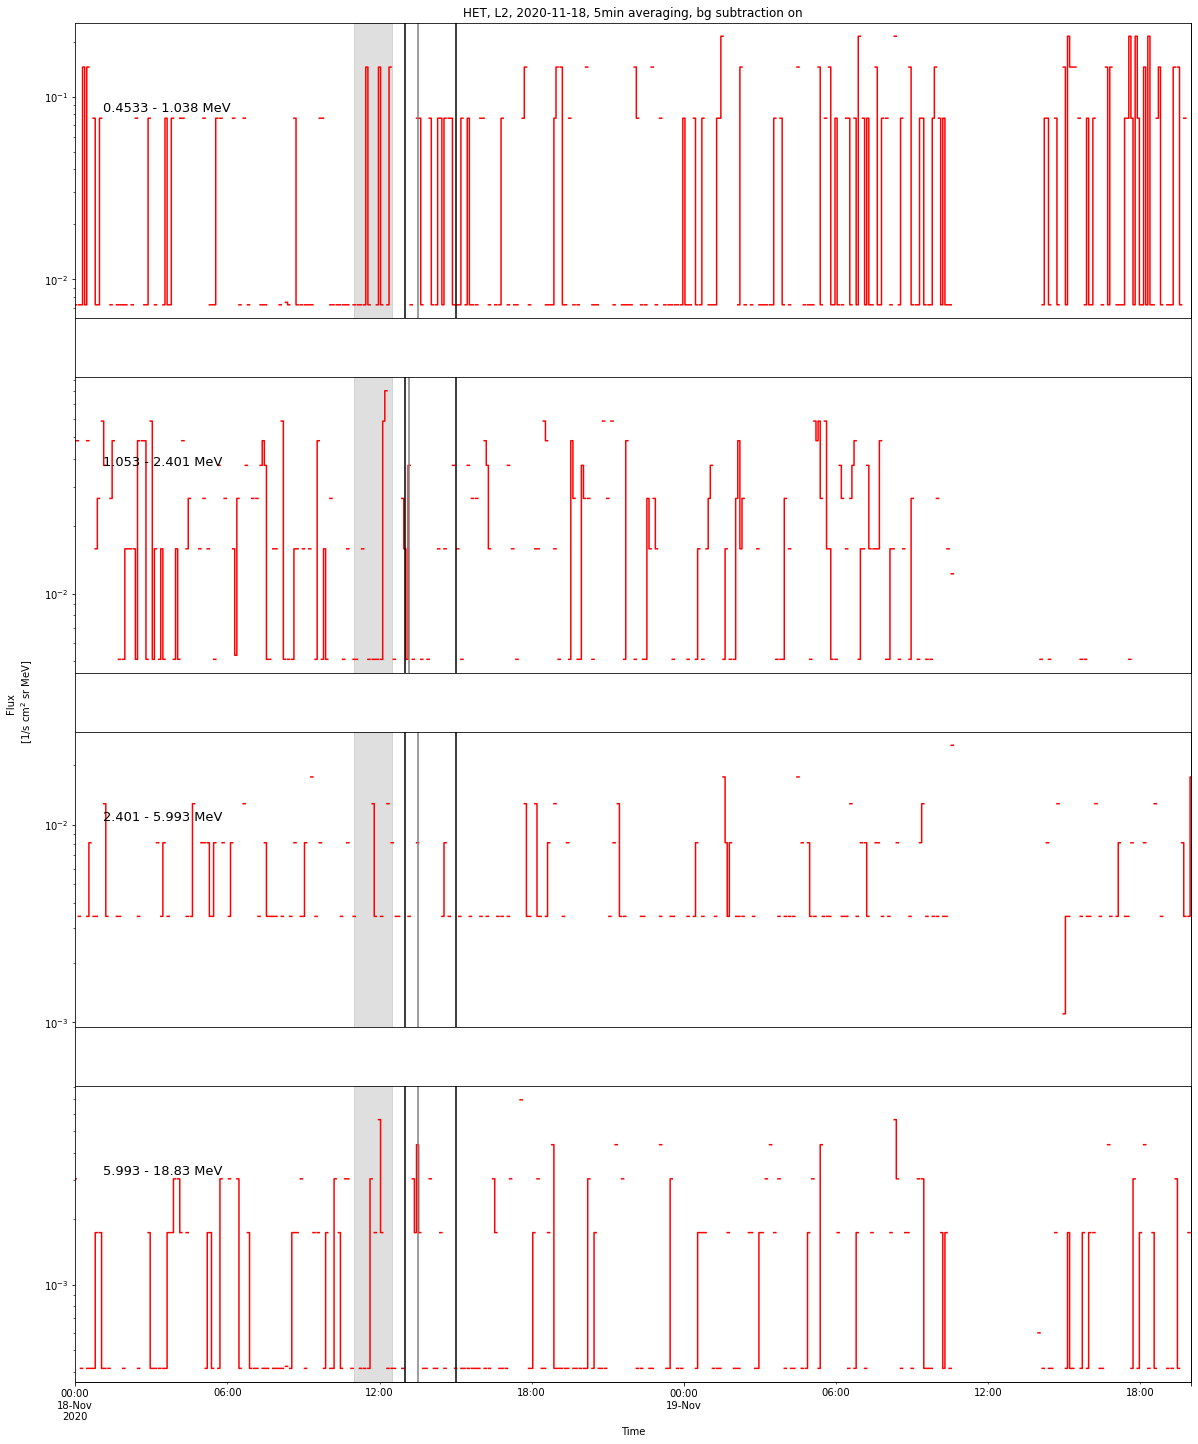

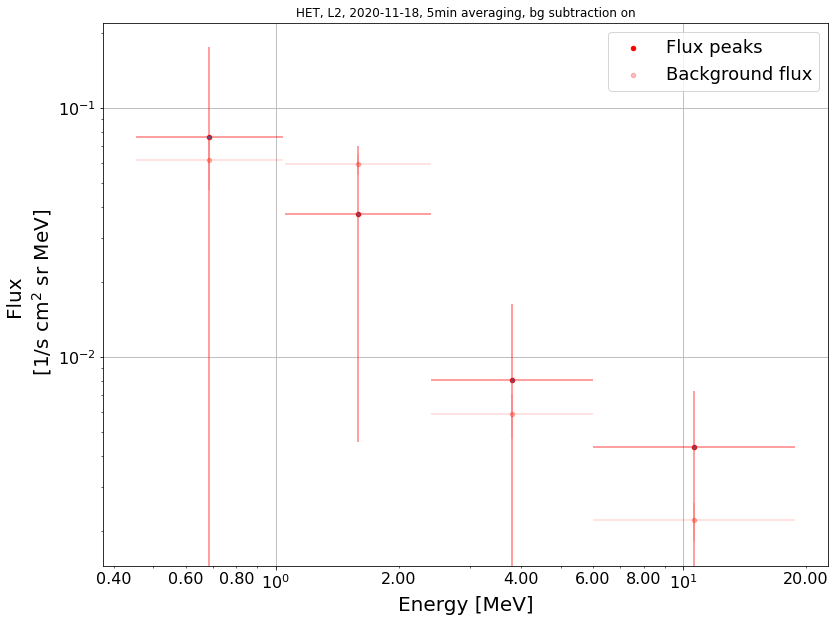

In [10]:
if(het):
    df_protons_het, df_electrons_het, energies_het = read_epd_cdf('het', 'sun', 'l2', start_date, end_date, path=data_path, autodownload=True)
    data_het = extract_data(df_protons_het, df_electrons_het, plot_start, plot_end, search_start, search_end, bg_start, bg_end, instrument='het', data_type='l2', averaging_mode=averaging_mode, averaging=averaging)
    if saving: write_to_csv(data_het, path=csv_path)
    for bg_b in [False, True]:
        plot_channels(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)
        plot_spectrum(data_het, bg_subtraction=bg_b, path=image_path, savefig=saving)

---------
### STEP

In [16]:
df_electron_fluxes = data_step[0][plot_start:plot_end]
data = df_electron_fluxes['Electron_Flux_1'][search_start:search_end]
data
print(np.sum(np.isnan(data)))
print(len(data))
print(len(data)-np.sum(np.isnan(data))/len(data))
#data


14
25
24.44
